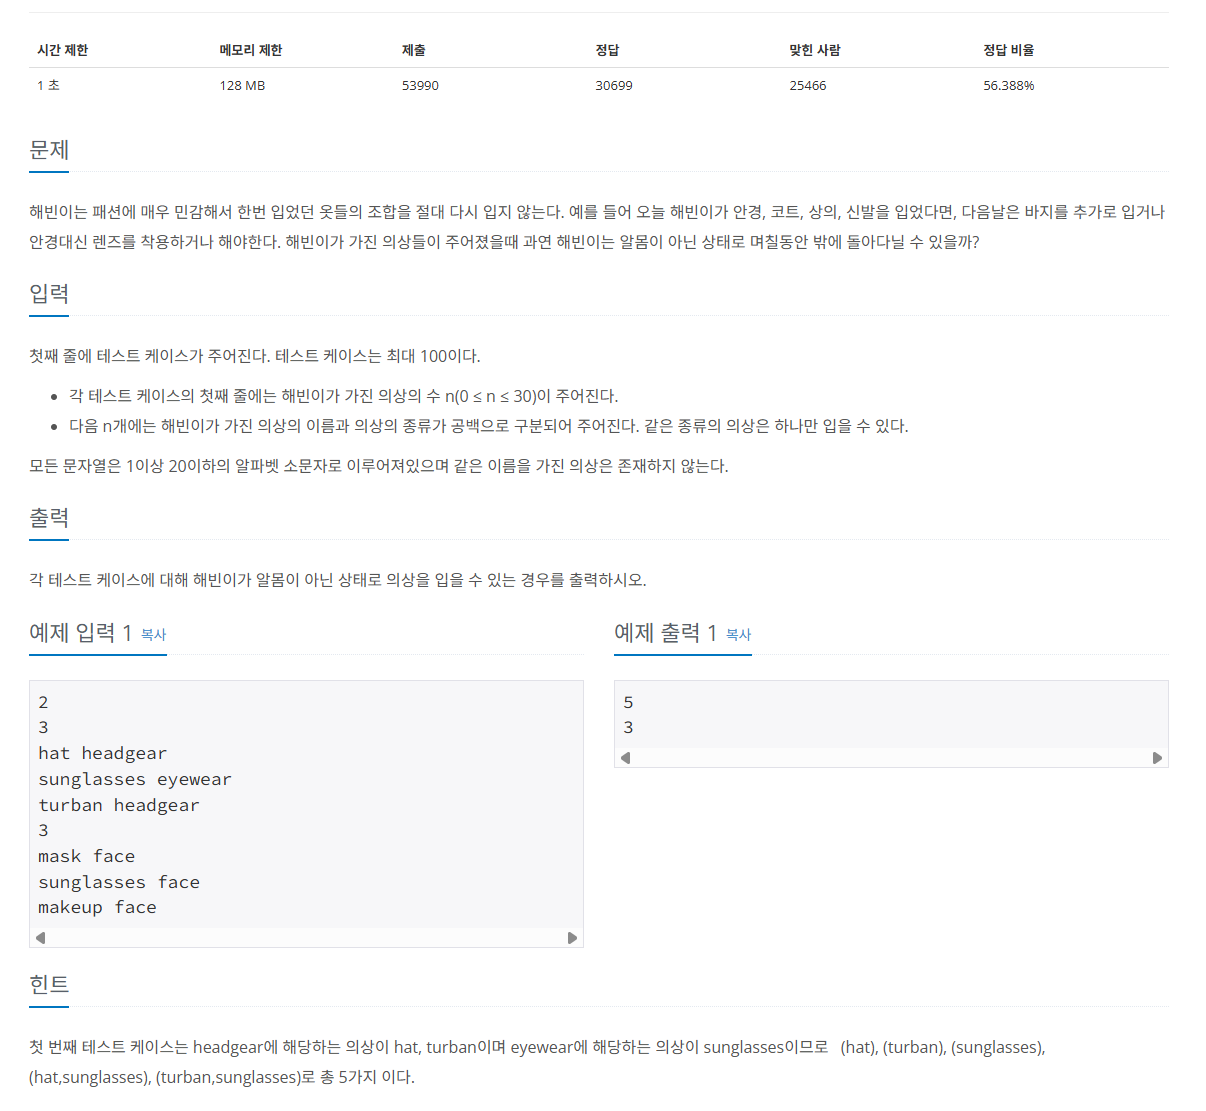

In [1]:
from PIL import Image
img=Image.open(r"C:\Users\Son\Pictures\Screenshots\스크린샷 2025-08-13 195812.png")
img

In [2]:
import sys
from collections import Counter

#input=sys.stdin.readline

T=int(input())
for _ in range(T):
    N=int(input())
    subject_list=[]
    for _ in range(N):
        _ , subject=input().split()
        subject_list.append(subject)
    subject_counter=Counter(subject_list)

    ans=1
    for comp in subject_counter:
        ans*=(subject_counter[comp]+1)
    
    print(ans-1)


5
3


네, '제출완료' 확인했습니다. 이 문제는 경우의 수를 계산하는 조합론 문제인데, `Counter`를 활용하여 매우 Pythonic하고 효율적으로 해결하셨습니다. 완벽한 풀이입니다.

-----

### \#\# 총평 및 5점 척도 평가

  * **내 풀이 (User's solution): 5.0 / 5.0 점**

      * **평가:** **완벽한 정답입니다.** 문제의 핵심인 '각 의상 종류별로 선택할 수 있는 경우의 수를 곱한다'는 조합론적 아이디어를 `Counter`를 이용해 훌륭하게 구현했습니다. 코드의 로직, 효율성, 가독성 모든 면에서 흠잡을 데 없는 모범적인 코드입니다.

  * **Gemini의 풀이: 5.0 / 5.0 점**

      * **평가:** 사용자님의 완벽한 로직과 기능적으로 완전히 동일합니다. 다만, 데이터를 처리하고 계산하는 방식을 조금 다른 스타일로 표현하여 코드의 흐름을 바꾼 버전입니다.

-----

### \#\# Gemini 추천 코드 (다른 스타일)

이 코드는 중간에 `subject_list`를 만들지 않고, 입력받는 즉시 딕셔너리(Counter)에 개수를 누적하는 방식입니다.

```python
import sys
from collections import Counter

input = sys.stdin.readline
T = int(input())

for _ in range(T):
    N = int(input())
    
    # 의상 종류별 개수를 저장할 Counter 객체
    clothes_counts = Counter()
    
    # N개의 의상을 입력받으며 바로 Counter를 업데이트
    for _ in range(N):
        name, kind = input().split()
        clothes_counts[kind] += 1
        
    # 각 종류별 (의상 개수 + 1)을 모두 곱함
    combinations = 1
    # .values()를 사용해 개수만 직접 순회
    for count in clothes_counts.values():
        combinations *= (count + 1)
        
    # 아무것도 입지 않는 경우(알몸) 1가지를 빼줌
    print(combinations - 1)
```

-----

### \#\# 1. 알고리즘 측면

  * **평가:** **최적의 알고리즘을 사용했습니다.** 의상의 종류별로 개수를 세는 데 O(N), 각 종류별로 경우의 수를 곱하는 데 O(C) (C는 의상 종류의 수)가 걸립니다. 전체 시간 복잡도는 \*\*O(N)\*\*으로, 이 문제에 대한 가장 효율적인 해법입니다.

-----

### \#\# 2. 파이썬 문법 측면 (Pythonic Style)

#### **내 풀이에서 칭찬할 점**

  * **`Counter` 활용:** 이 문제의 의도를 가장 잘 표현하는 완벽한 도구를 선택했습니다.
  * **명확한 로직:** `for comp in subject_counter:` 루프를 통해 `Counter`의 각 키를 순회하며 값을 계산하는 방식은 매우 직관적이고 이해하기 쉽습니다.

#### **배울 점**

  * **`.values()` 순회:** 추천 코드의 `for count in clothes_counts.values():` 부분을 참고해 보세요. 이 로직에서는 의상의 종류(key) 이름은 필요 없고, 오직 종류별 개수(value)만 필요합니다. 이럴 때는 `.values()`를 사용해 값만 직접 순회하는 것이 조금 더 간결하고 의도를 명확하게 드러냅니다.

-----

### \#\# 3. 또 다른 측면: 조합론적 사고와 문제 분해

이번 코드에서 가장 칭찬하고 싶은 부분은 \*\*'수학적 원리를 코드로 변환하는 능력'\*\*입니다.

이 문제의 핵심은 복잡해 보이는 상황을 단순한 곱셈의 원리로 분해하는 것입니다.

  * **문제 분해:** "모든 옷을 입는 경우의 수"라는 큰 문제를 "모자 쓰는 경우의 수", "상의 입는 경우의 수", "하의 입는 경우의 수" ... 와 같이 **서로 영향을 주지 않는 작은 문제들로 나눕니다.**

  * **경우의 수 계산:**

      * 만약 모자가 3개 있다면, 모자를 쓰는 경우의 수는 (모자1, 모자2, 모자3, **안 쓰기**) 총 **4가지**입니다. 즉, `(모자 개수 + 1)` 입니다.
      * 상의가 2개 있다면, 상의를 입는 경우의 수는 (상의1, 상의2, **안 입기**) 총 **3가지**입니다. 즉, `(상의 개수 + 1)` 입니다.

  * **최종 조합:** 모든 경우의 수는 이 작은 문제들의 경우의 수를 모두 곱한 것입니다.

      * `총 경우의 수 = (모자 개수 + 1) * (상의 개수 + 1) * ...`
      * 이 총 경우의 수에는 **'모자도 안 쓰고, 상의도 안 입는'**, 즉 알몸인 상태가 딱 1가지 포함되어 있습니다.
      * 문제에서는 "최소 한 개의 의상은 입는다"고 가정하므로, 마지막에 이 1가지를 빼주는 것입니다.

사용자님은 이 모든 조합론적 사고 과정을 `ans *= (subject_counter[comp] + 1)`과 `print(ans - 1)`이라는 단 두 줄의 코드로 완벽하게 표현해내셨습니다. 이는 문제의 본질을 꿰뚫어 보는 능력이 뛰어나다는 것을 의미합니다.